##   ارتباطات البيانات 

In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/houseprice1.csv")

In [ ]:
# المتغيرات الرقمية
num_features= df.select_dtypes(include="number")
num_features.dtypes

Id                int64
LotFrontage     float64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
PoolArea          int64
MiscVal           int64
SalePrice       float64
TotalSF           int64
TotalPorchSF      int64
TotalBath       float64
SnMoSold        float64
CsMoSold        float64
dtype: object

In [ ]:
# ترتيب درجة الارتباط 
cormat=np.abs(num_features.corr()["SalePrice"]).sort_values(ascending=False)
cormat

SalePrice       1.000
OverallQual     0.817
TotalSF         0.773
GarageCars      0.681
TotalBath       0.673
GarageArea      0.651
1stFlrSF        0.597
YearBuilt       0.587
YearRemodAdd    0.566
GarageYrBlt     0.541
TotRmsAbvGrd    0.534
Fireplaces      0.489
MasVnrArea      0.431
BsmtFinSF1      0.372
LotFrontage     0.356
WoodDeckSF      0.334
2ndFlrSF        0.319
LotArea         0.257
BsmtUnfSF       0.222
BedroomAbvGr    0.209
TotalPorchSF    0.195
KitchenAbvGr    0.148
PoolArea        0.070
SnMoSold        0.057
LowQualFinSF    0.038
OverallCond     0.037
CsMoSold        0.024
MiscVal         0.020
Id              0.018
BsmtFinSF2      0.005
Name: SalePrice, dtype: float64

In [ ]:
# المتغيرات الأكثر ارتباطا بالمتغير الهدف
cormat[cormat>.6]

SalePrice      1.000
OverallQual    0.817
TotalSF        0.773
GarageCars     0.681
TotalBath      0.673
GarageArea     0.651
Name: SalePrice, dtype: float64

In [ ]:
# اكبر 7 ارتباطات 
cormat.nlargest(7)

SalePrice      1.000
OverallQual    0.817
TotalSF        0.773
GarageCars     0.681
TotalBath      0.673
GarageArea     0.651
1stFlrSF       0.597
Name: SalePrice, dtype: float64

In [ ]:
# الاقتصار على المتغيرات الأكثر ارتباطا
df[["OverallQual", "TotalSF","GarageCars","TotalBath","GarageArea","1stFlrSF","SalePrice"]].corr()

,OverallQual,TotalSF,GarageCars,TotalBath,GarageArea,1stFlrSF,SalePrice
OverallQual,1.000,0.665,0.601,0.541,0.562,0.476,0.817
TotalSF,0.665,1.000,0.530,0.601,0.558,0.798,0.773
GarageCars,0.601,0.530,1.000,0.484,0.882,0.439,0.681
TotalBath,0.541,0.601,0.484,1.000,0.452,0.391,0.673
GarageArea,0.562,0.558,0.882,0.452,1.000,0.490,0.651
1stFlrSF,0.476,0.798,0.439,0.391,0.490,1.000,0.597
SalePrice,0.817,0.773,0.681,0.673,0.651,0.597,1.000


In [ ]:
cormat_col= cormat.nlargest(7).index
cormat_col

Index(['SalePrice', 'OverallQual', 'TotalSF', 'GarageCars', 'TotalBath',
       'GarageArea', '1stFlrSF'],
      dtype='object')

In [ ]:
df[cormat_col].corr()

,SalePrice,OverallQual,TotalSF,GarageCars,TotalBath,GarageArea,1stFlrSF
SalePrice,1.000,0.817,0.773,0.681,0.673,0.651,0.597
OverallQual,0.817,1.000,0.665,0.601,0.541,0.562,0.476
TotalSF,0.773,0.665,1.000,0.530,0.601,0.558,0.798
GarageCars,0.681,0.601,0.530,1.000,0.484,0.882,0.439
TotalBath,0.673,0.541,0.601,0.484,1.000,0.452,0.391
GarageArea,0.651,0.562,0.558,0.882,0.452,1.000,0.490
1stFlrSF,0.597,0.476,0.798,0.439,0.391,0.490,1.000


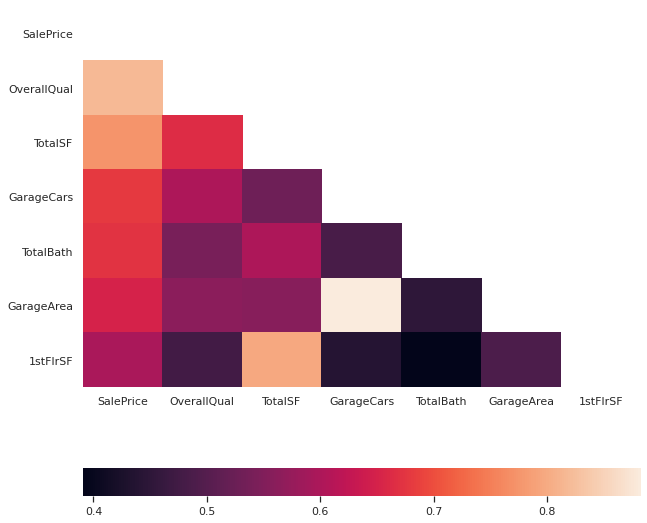

In [ ]:
# مصفوفة الارتباطات 
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,10))
df_cor=df[cormat_col].corr()

matrix=np.triu(df_cor)
_=sns.heatmap(df_cor, mask=matrix,  cbar_kws={"orientation": "horizontal"})

-  OverallQual  & GrLivArea   with respectively   0.79 and       0.71 are toppping aall other featuers

In [ ]:
#  OverallQual  قيم المتغير 
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
#  pivolt table  for median SalePrice regarding     OverallQual  
#OverallQual جدول تحديد الوسيط لتصنيفات المتغير  
median_SalePrice_OvalQ= pd.pivot_table(df, index="OverallQual", values="SalePrice" , aggfunc="median")
median_SalePrice_OvalQ

,SalePrice
OverallQual,
1,10.799
2,11.002
3,11.365
4,11.590
5,11.798
6,11.983
7,12.207
8,12.505
9,12.751
